In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# def pltDefaultPar():
#     #reset default matplotlib parameters for this notebook
#     plt.rcParams.update({'font.size': 20})
#     plt.rcParams['lines.linewidth'] = 1
#     plt.rcParams['lines.markersize'] = 6
    
def pltPrintPar():
    plt.rcParams.update({'font.size': 11})
    plt.rcParams['lines.linewidth'] = 1
    plt.rcParams['lines.markersize'] = 6

rootTP="/home/johann/Remote/imac"
rootMAC="/Users/jh"
root=rootMAC


# Compare to Phillips1990
Here I will compare simulations to data by Phillips1990 in a similar, square lattice, like him

In [46]:
# Eq. 25 in Phillips1989: d is the touching distance of the spheres along a fiber and b the spacing of the fibers
def phi(a,d,b):
    return 4./3*np.pi*(a/2.)**3 / ((a+d)*b**2)


In [21]:
b=10.5
a=1.67
b/(a*1.05)

5.9880239520958085

In [17]:
a=3.3
ra=a/2
b=10.5
np.pi*ra**2/b**2

0.0775781043029316

In [53]:
def dd0phillips1990(phi,aop):
    lam=1./aop
    alpha=5.177-4.01*lam+5.44*lam**2-0.61*lam**3
    return np.exp(-alpha*phi**(3./4))

In [111]:
def getDop_aop(aop,n=1,trigger='',system='',oldLub=False,dt='0.001',b0=10.5):
    initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/"+system
    if oldLub==True:
        initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset_oldLubBadg/fitRPinv/"+system
    b=b0*n
    bstr=str(b).rstrip('0').rstrip(".")
    folder=initfolder
    data=[]
    if n==1: 
        folder+="/"+trigger
    else: 
        if system=='':
            folder+="/test"
        folder+="/n"+str(n)+"/"+trigger
    folder+="/dt"+dt+"/t200/"
    #print(folder)
    for adir in os.listdir(folder): 
        if "DS" in adir: continue
        a=float(adir[1:])
        p=a/aop
        pstr='%s' % float('%g' % p)
        pstr=pstr.rstrip('0').rstrip(".")
        pdir='p'+pstr
        arel=(float(a)/b0)                 # make p value p/b
        prel=p/b0
        file=os.path.join(folder,adir,'d0/b'+bstr,pdir,'k1.000/u0/InstantValues/linear_fit_parametersMSD.txt')
        #print(file)
        if os.path.isfile(file):
            #print(file)
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(prel),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        else: print("Error: File not found!\n"+str(file))
    return np.array(sorted(data))

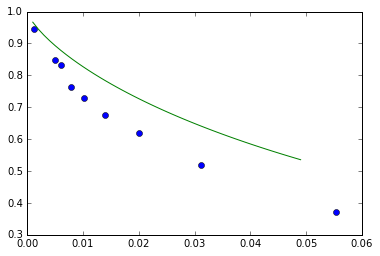

In [77]:
aop=1
pdata=getDop_aop(aop,system='test/2DLattice',dt="0.0005",b0=10.5)
phis=[phi(aop*p,0.05*aop*p,1) for p in pdata[:,0]]
dd0s=[dd0/4. for dd0 in pdata[:,1]]
xs=np.arange(0.001,0.05,0.001)
plt.plot(phis,dd0s,'o')
plt.plot(xs,dd0phillips1990(xs,aop))

Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/test/2DLattice/n2//dt0.0005/t200/a1.66/d0/b21/p1.66/k1.000/u0/InstantValues/linear_fit_parametersMSD.txt
Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/test/2DLattice/n2//dt0.0005/t200/a0.5/d0/b21/p1/k1.000/u0/InstantValues/linear_fit_parametersMSD.txt
Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/test/2DLattice/n2//dt0.0005/t200/a1.66/d0/b21/p3.32/k1.000/u0/InstantValues/linear_fit_parametersMSD.txt
Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/test/2DLattice/n2//dt0.0005/t200/a0.5/d0/b21/p0.25/k1.000/u0/InstantValues/linear_fit_parametersMSD.txt
Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/test/2DLattice/n2//dt0.0005/t200/a1.66/d0/b21/p0.83/k1.000/u0/InstantValues/linear_fit_parametersMSD.txt
Error

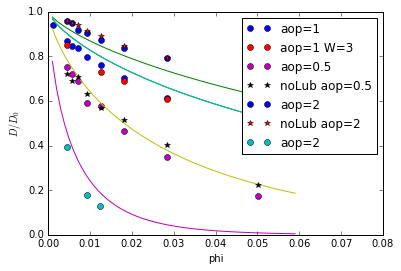

In [118]:
aop=1
W=2
b0=10.5
pdata=getDop_aop(aop,system='test/2DLattice',dt="0.0005",b0=b0,n=W)
phis=[phi(aop*p,0.05*aop*p,1) for p in pdata[:,0]]
dd0s=[dd0/4. for dd0 in pdata[:,1]]
xs=np.arange(0.001,0.06,0.001)
plt.plot(phis,dd0s,'o',label='aop=1')
plt.plot(xs,dd0phillips1990(xs,aop))


aop=1
W=3
b0=10.5
pdata=getDop_aop(aop,system='test/2DLattice',dt="0.0005",b0=b0,n=W)
phis=[phi(aop*p,0.05*aop*p,1) for p in pdata[:,0]]
dd0s=[dd0/4. for dd0 in pdata[:,1]]
xs=np.arange(0.001,0.06,0.001)
plt.plot(phis,dd0s,'o',label='aop=1 W='+str(W))
plt.plot(xs,dd0phillips1990(xs,aop))


aop=0.5
W=2
pdata=getDop_aop(aop,system='test/2DLattice',dt="0.0005",b0=b0,n=W)
phis=[phi(aop*p,0.05*aop*p,1) for p in pdata[:,0]]
dd0s=[dd0/4. for dd0 in pdata[:,1]]
plt.plot(phis,dd0s,'o',label='aop=0.5')
plt.plot(xs,dd0phillips1990(xs,aop))
plt.xlabel('phi')
plt.ylabel('$D/D_0$')
plt.ylim([0,1.0])
plt.xlim([0,0.08])
### aop=0.5 NoLub ###
pdata=getDop_aop(aop,system='test/2DLattice',trigger='noLub/steric',dt="0.0005",b0=b0,n=W)
phis=[phi(aop*p,0.05*aop*p,1) for p in pdata[:,0]]
dd0s=[dd0/4. for dd0 in pdata[:,1]]
plt.plot(phis,dd0s,'*',label='noLub aop=0.5')
plt.xlabel('phi')
plt.ylabel('$D/D_0$')
plt.ylim([0,1.0])
plt.xlim([0,0.08])

#### aop = 2 ####
aop=2
W=2
pdata=getDop_aop(aop,system='test/2DLattice',dt="0.0005",b0=b0,n=W)
phis=[phi(aop*p,0.05*aop*p,1) for p in pdata[:,0]]
dd0s=[dd0/4. for dd0 in pdata[:,1]]
plt.plot(phis,dd0s,'o',label='aop=2')
plt.plot(xs,dd0phillips1990(xs,aop))
plt.xlabel('phi')
plt.ylabel('$D/D_0$')
plt.ylim([0,1.0])
plt.xlim([0,0.08])

### aop=2 NoLub ###
aop=2
W=2
pdata=getDop_aop(aop,system='test/2DLattice',trigger='noLub/steric',dt="0.0005",b0=b0,n=W)
phis=[phi(aop*p,0.05*aop*p,1) for p in pdata[:,0]]
dd0s=[dd0/4. for dd0 in pdata[:,1]]
plt.plot(phis,dd0s,'*',label='noLub aop=2')
plt.xlabel('phi')
plt.ylabel('$D/D_0$')
plt.ylim([0,1.0])
plt.xlim([0,0.1])

### aop=0.2 ###
aop=0.2
W=2
pdata=getDop_aop(aop,system='test/2DLattice',dt="0.0005",b0=b0,n=W)
phis=[phi(aop*p,0.05*aop*p,1) for p in pdata[:,0]]
dd0s=[dd0/4. for dd0 in pdata[:,1]]
plt.plot(phis,dd0s,'o',label='aop=2')
plt.plot(xs,dd0phillips1990(xs,aop))
plt.xlabel('phi')
plt.ylabel('$D/D_0$')
plt.ylim([0,1.0])
plt.xlim([0,0.08])

plt.legend(loc=1)
plt.show()

# Conclusion:
- aop=0.5 result looks fine, considering that Phillips used a larger system (W=3). The aop=1 case leads to too small diffusivities, even with a larger W=3 system. I am unsure about the aop=2 case. Phillips used a larger system but the offset should not be as great. Actually, a larger system should lead to higher diffusivities, not smaller, so the offset between my data and Phillips1990 would be even greater. Maybe there is a mistake in my numerics for aop!=1 after all
- I'll need to check if aop=0.2 case looks good. If so, then I know that my HI work kind of for small aop and I can start simulations. If not... I dont know.


- comparing aop=2 data with noLub, we see that lub does not have a strong effect, hence the error most likely *does not* lie in the computation of lub2p. I assume my Ewald summation of RP is wrong for aop!=1.
- The possibility that my Ewald summation overestimates the diffusivity for aop>1 by a large margin could also explain the too large diffusivities for a=2 at small p/a in ExperimentalData.ipynb without lubrication.

# TODO 
- plot W=2 aop = 0.2 and compare to lambda=5
- plot W=3 aop = 1 with lub and check if data agrees

### Below: Smaller cutoff
A smaller cutoff for updating the Ewald-summed mobility matrix does not seem to make a difference

(0, 0.08)

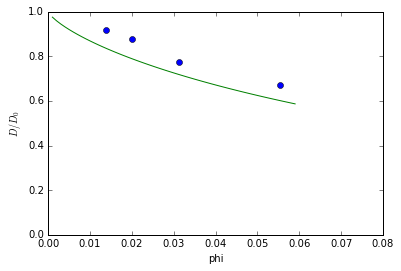

In [106]:
### W = 2   --  _cutoffMMsq = 0.02b ###
aop=2
W=2
pdata=getDop_aop(aop,system='test/2DLattice/_cutoffMMsq002',dt="0.0005",b0=b0,n=W)
phis=[phi(aop*p,0.05*aop*p,1) for p in pdata[:,0]]
dd0s=[dd0/4. for dd0 in pdata[:,1]]
plt.plot(phis,dd0s,'o',label='W=2 aop=2')
plt.plot(xs,dd0phillips1990(xs,aop))
plt.xlabel('phi')
plt.ylabel('$D/D_0$')
plt.ylim([0,1.0])
plt.xlim([0,0.08])